# Part 1: Text classification

Students:
- Konstantinos Nikoletos
- Konstantinos Plas

## Question 1.1: Get to know the Data: WordCloud

In [1]:
import pandas as pd
from tqdm import tqdm

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/nikoletos-
[nltk_data]     ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nikoletos-
[nltk_data]     ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading the dataset

In [2]:
train_data = pd.read_csv('./Part-1/data/train.csv', sep=',')
test_data = pd.read_csv('./Part-1/data/test_without_labels.csv', sep=',')


print("Train data shape: ", train_data.shape)
print(train_data.head())
train_data['text'] = train_data['Title'] + " " + train_data['Content']

print("\nTest data shape: ", test_data.shape)
print(test_data.head())
test_data['text'] = test_data['Title'] + " " + test_data['Content']

Train data shape:  (111795, 4)
       Id                                              Title  \
0  227464  Netflix is coming to cable boxes, and Amazon i...   
1  244074  Pharrell, Iranian President React to Tehran 'H...   
2   60707                    Wildlife service seeks comments   
3   27883  Facebook teams up with Storyful to launch 'FB ...   
4  169596           Caesars plans US$880 mln New York casino   

                                             Content          Label  
0   if you subscribe to one of three rinky-dink (...  Entertainment  
1   pharrell, iranian president react to tehran '...  Entertainment  
2   the u.s. fish and wildlife service has reopen...     Technology  
3   the very nature of social media means it is o...     Technology  
4   caesars plans us$880 mln new york casino jul ...       Business  

Test data shape:  (47912, 3)
       Id                                              Title  \
0  262120  Tracy Morgan upgraded to fair condition after ...   
1  175

## WordCloud Source code

In [3]:
def generate_wordcloud(text, title="WordCloud"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    print("Plotting the word cloud...")
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

    print("Saving the word cloud...")
    plt.savefig(title+'.png', bbox_inches='tight')

### Entertainment WordCloud

Plotting the word cloud...
Saving the word cloud...
Entertainment Word cloud generated.


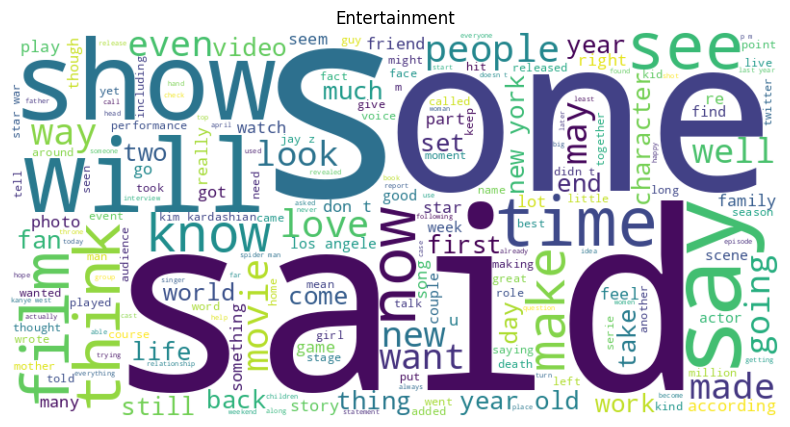

In [4]:
text = " ".join(review for review in train_data[train_data['Label']=='Entertainment']['text'])
generate_wordcloud(text, title="Entertainment")
print("Entertainment Word cloud generated.")

### Technology WordCloud

Plotting the word cloud...
Saving the word cloud...
Technology Word cloud generated.


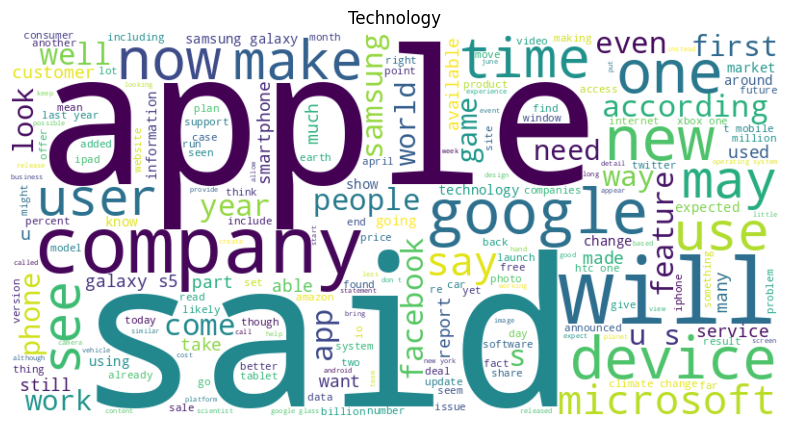

In [5]:
text = " ".join(review for review in train_data[train_data['Label']=='Technology']['text'])
generate_wordcloud(text, title="Technology")
print("Technology Word cloud generated.")

### Health WordCloud

Plotting the word cloud...
Saving the word cloud...
Health Word cloud generated.


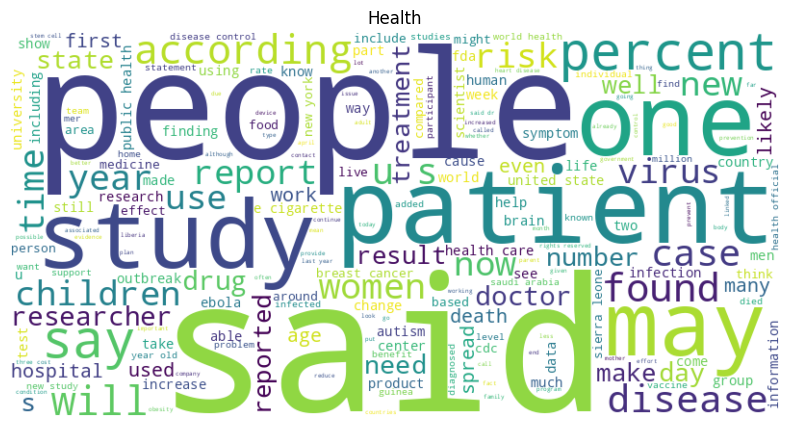

In [6]:
text = " ".join(review for review in train_data[train_data['Label']=='Health']['text'])
generate_wordcloud(text, title="Health")
print("Health Word cloud generated.")

### Business WordCloud

Plotting the word cloud...
Saving the word cloud...
Business Word cloud generated.


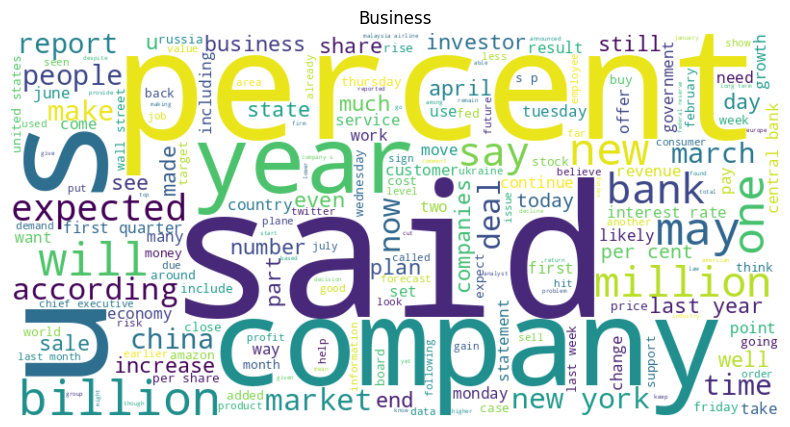

In [7]:
text = " ".join(review for review in train_data[train_data['Label']=='Business']['text'])
generate_wordcloud(text, title="Business")
print("Business Word cloud generated.")

## Printing again WordClouds but having processed the text

In [8]:
from stop_words import get_stop_words
stop_words_pypi = set(get_stop_words('en'))
# print(stop_words_pypi)

from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))
# print(stop_words_nltk)

manual_stop_words = {'include', 'way', 'work', 'look', 'add', 'time', 'year', 'one', \
                     'month', 'day', 'help', 'think', 'tell', 'new', 'said', 'say',\
                     'need', 'come', 'good', 'set', 'want', 'people', 'use', 'day', 'week', 'know'}

stop_words= stop_words_nltk.union(stop_words_pypi)
stop_words = stop_words.union(manual_stop_words)

In [9]:
# stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'\W', ' ', str(text))
    processed_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)
    processed_text = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_text)
    processed_text = re.sub(r'\s+', ' ', processed_text, flags=re.I)
    processed_text = re.sub(r'^b\s+', '', processed_text)

    tokens = [lemmatizer.lemmatize(word) for word in processed_text.split() if word not in stop_words]
    tokens = [token for token in tokens if token not in stop_words]
    processed_text = ' '.join(tokens)

    return processed_text

In [12]:
# from tqdm.notebook import tqdm
import os
from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()

preprocessed_file_path_train = 'pre_train.csv'
if not os.path.exists(preprocessed_file_path_train):
    print("[TRAIN] Preprocessing text...")
    train_data['text'] = train_data['text'].progress_apply(preprocess_text)
    print("[TRAIN] Preprocessing text done.")
    train_data.to_csv(preprocessed_file_path_train, index=False)
else:
    print("[TRAIN] Reading from file")
    train_data = pd.read_csv(preprocessed_file_path_train)

preprocessed_file_path_test = 'pre_test.csv'
if not os.path.exists(preprocessed_file_path_test):
    print("[TEST] Preprocessing text...")
    test_data['text'] = test_data['text'].progress_apply(preprocess_text)
    print("[TEST] Preprocessing text done.")
    test_data.to_csv(preprocessed_file_path_test, index=False)
else:
    print("[TEST] Reading from file")
    test_data = pd.read_csv(preprocessed_file_path_test)

[TRAIN] Preprocessing text...


  0%|          | 0/111795 [00:00<?, ?it/s]

[TRAIN] Preprocessing text done.
[TEST] Preprocessing text...


  0%|          | 0/47912 [00:00<?, ?it/s]

[TEST] Preprocessing text done.


### Entertainment WordCloud

Plotting the word cloud...
Saving the word cloud...
Entertainment Word cloud generated.


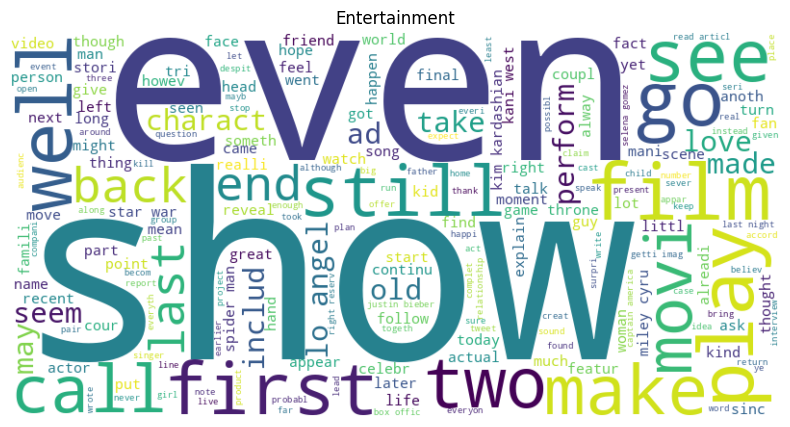

In [13]:
text = " ".join(review for review in train_data[train_data['Label']=='Entertainment']['text'])
generate_wordcloud(text, title="Entertainment")
print("Entertainment Word cloud generated.")

### Technology WordCloud

Plotting the word cloud...
Saving the word cloud...
Technology Word cloud generated.


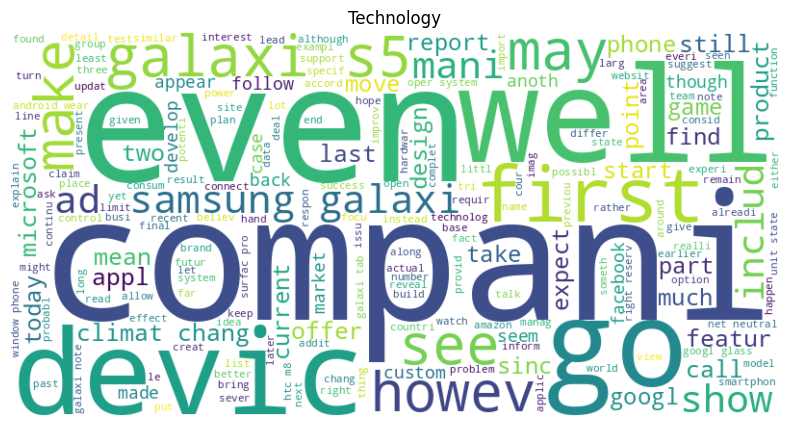

In [14]:
text = " ".join(review for review in train_data[train_data['Label']=='Technology']['text'])
generate_wordcloud(text, title="Technology")
print("Technology Word cloud generated.")

### Health WordCloud

Plotting the word cloud...
Saving the word cloud...
Health Word cloud generated.


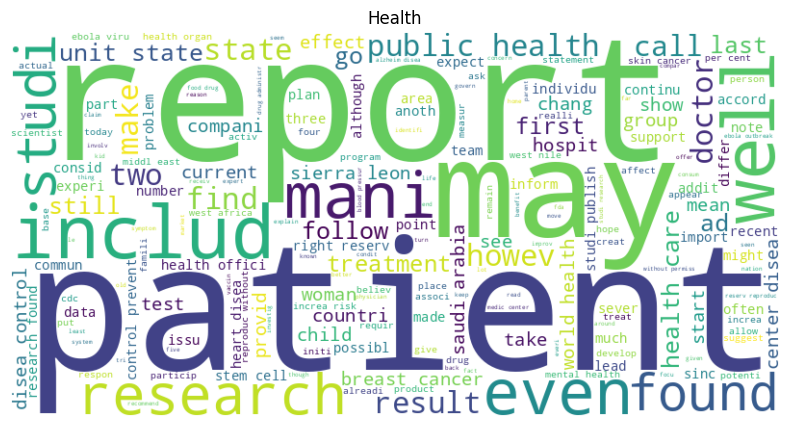

In [15]:
text = " ".join(review for review in train_data[train_data['Label']=='Health']['text'])
generate_wordcloud(text, title="Health")
print("Health Word cloud generated.")

### Business WordCloud

Plotting the word cloud...
Saving the word cloud...
Business Word cloud generated.


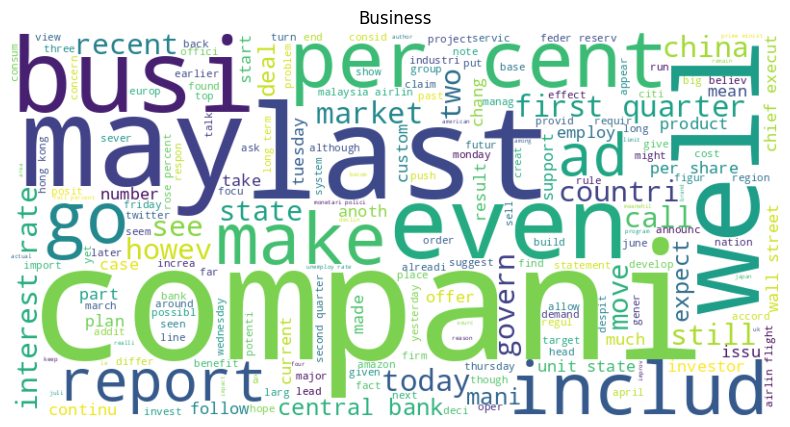

In [16]:
text = " ".join(review for review in train_data[train_data['Label']=='Business']['text'])
generate_wordcloud(text, title="Business")
print("Business Word cloud generated.")

## Question 1.2: Classification Task

In [17]:
train_data = train_data.head(1000)
test_data = test_data.head(1000)

### BoW, Tf-Idf vectorization with K-fold for SVM and RandomForest

In [18]:
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [19]:
X = train_data['text'].astype(str)
y = train_data['Label']

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_data['text'])
X_test_bow = vectorizer.transform(test_data['text'])

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data['text'])
X_test_tfidf = vectorizer.transform(test_data['text'])

In [20]:
svm_classifier = SVC(kernel='linear')
rf_classifier = RandomForestClassifier(n_estimators=1000, max_features='sqrt', n_jobs=-1)
vectorizers = ['TF-IDF', 'BoW']

In [21]:
for classifier_name, classifier in [('SVM', svm_classifier), ('Random Forest', rf_classifier)]:
    for vectorizer in vectorizers:

        X = X_train_tfidf if vectorizer == 'TF-IDF' else X_train_bow

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        for train_index, _ in stratified_kfold.split(X_train, y_train):
            print(classifier_name, " with ", vectorizer, "[ ",  train_index[0], ",", train_index[-1] , " ]" )
            X_train_fold, y_train_fold = X_train[train_index], np.array(y_train)[train_index]
            classifier.fit(X_train_fold, y_train_fold)
        predictions = classifier.predict(X_test)

        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')
        f1 = f1_score(y_test, predictions, average='macro')
        accuracy = accuracy_score(y_test, predictions)
        print(f"\n\nResults for {classifier_name} + {vectorizer}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F-Score: {f1:.4f}")
        print(classification_report(y_test, predictions))


SVM  with  TF-IDF [  0 , 799  ]
SVM  with  TF-IDF [  1 , 797  ]
SVM  with  TF-IDF [  0 , 799  ]
SVM  with  TF-IDF [  0 , 799  ]
SVM  with  TF-IDF [  0 , 799  ]


Results for SVM + TF-IDF:
Accuracy: 0.8850
Precision: 0.9017
Recall: 0.8479
F-Score: 0.8675
               precision    recall  f1-score   support

     Business       0.83      0.85      0.84        41
Entertainment       0.89      0.97      0.93        75
       Health       1.00      0.70      0.82        23
   Technology       0.88      0.87      0.88        61

     accuracy                           0.89       200
    macro avg       0.90      0.85      0.87       200
 weighted avg       0.89      0.89      0.88       200

SVM  with  BoW [  0 , 799  ]
SVM  with  BoW [  1 , 797  ]
SVM  with  BoW [  0 , 799  ]
SVM  with  BoW [  0 , 799  ]
SVM  with  BoW [  0 , 799  ]


Results for SVM + BoW:
Accuracy: 0.8700
Precision: 0.8719
Recall: 0.8371
F-Score: 0.8518
               precision    recall  f1-score   support

     Busine

### Best model - LinearSVC with Tf-Idf

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
train_data = train_data.head(2000)
# test_data = test_data.head(1000)

In [24]:
label_encoder = LabelEncoder()
train_data['_Label'] = label_encoder.fit_transform(train_data['Label'])

X = train_data['text']
y = train_data['_Label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data['text'])
X_test_tfidf = vectorizer.transform(test_data['text'])

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=42, tol=1e-5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
accuracy = accuracy_score(y_test, predictions)
print(f"\n\nResults for XGBClassifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F-Score: {f1:.4f}")
print(classification_report(y_test, predictions))



Results for XGBClassifier:
Accuracy: 0.9050
Precision: 0.9086
Recall: 0.8778
F-Score: 0.8912
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.90      0.97      0.94        75
           2       0.90      0.78      0.84        23
           3       0.89      0.90      0.89        61

    accuracy                           0.91       200
   macro avg       0.91      0.88      0.89       200
weighted avg       0.91      0.91      0.90       200



/home/nikoletos-ubuntu/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [26]:
best_model = classifier
test_predictions = best_model.predict(X_test_tfidf)

output_df = pd.DataFrame({'Id': test_data['Id'], 'Predicted': label_encoder.inverse_transform(test_predictions)})
output_df.to_csv('testSet_categories.csv', index=False)

print("Predictions saved to testSet_categories.csv")

Predictions saved to testSet_categories.csv
